In [2]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import sys
from sklearn.neighbors import NearestNeighbors

In [3]:
movies1=pd.read_json('nepali movie set1.txt')

In [4]:
movies1.head()

,imdb_url,title,year,runtime,genre,rating,votes,plot
0,https://www.imdb.com/title/tt7229666/,Chhakka Panja 2,2017,138 min,"Comedy, Drama",6.6,290.0,Chhakka Panja 2 continues with new story of Ra...
1,https://www.imdb.com/title/tt8393764/,Chhakka Panja 3,2018,None,Comedy,6.3,96.0,When she learns about the worst condition of t...
2,https://www.imdb.com/title/tt7672868/,Intu Mintu Londonma,2018,120 min,Romance,7.3,71.0,When Ishan (Dhiraj Magar) and Meera (Samragyee...
3,https://www.imdb.com/title/tt10942220/,Kabaddi Kabaddi Kabaddi,2019,None,"Comedy, Drama, Romance",8.6,9.0,Add a Plot
4,https://www.imdb.com/title/tt8387542/,Captain,2019,None,"Drama, Sport",3.2,46.0,Father's dedication to guiding his son to beco...


In [5]:
Cast=pd.read_csv('Cast.csv')
Cast

,cast,Unnamed: 1,Unnamed: 2,title
0,"Deepak Raj Giri', 'Kedar Ghimire', 'Priyanka K...",NaN,NaN,Chhakka Panja 2 ...
1,"Anish Adhikary', 'Kedar Ghimire', 'Deepak Raj ...",NaN,NaN,Chhakka Panja 3 ...
2,"'Samragyee Rajya Laxmi Shah', 'Dhiraj Magar', ...",NaN,NaN,Intu Mintu Londonma
3,"'Nabin Luhagun', 'Kabita Ale', 'Bijay Baral', ...",NaN,NaN,Kabaddi Kabaddi Kabaddi
4,"'Brie Larson', 'Samuel L. Jackson', 'Ben Mende...",NaN,NaN,Captain
...,...,...,...,...
1572,"'Jaswant Dev Shrestha', 'Shyamal Prasad', 'Kum...",NaN,NaN,Pokhara.com
1573,"'Jaswant Dev Shrestha', 'Shyamal Prasad', 'Kum...",NaN,NaN,Pokhara.com
1574,"'Jaswant Dev Shrestha', 'Shyamal Prasad', 'Kum...",NaN,NaN,Pokhara.com
1575,"'Jaswant Dev Shrestha', 'Shyamal Prasad', 'Kum...",NaN,NaN,Pokhara.com


In [6]:
Cast=Cast[['cast','title']]
Cast

,cast,title
0,"Deepak Raj Giri', 'Kedar Ghimire', 'Priyanka K...",Chhakka Panja 2 ...
1,"Anish Adhikary', 'Kedar Ghimire', 'Deepak Raj ...",Chhakka Panja 3 ...
2,"'Samragyee Rajya Laxmi Shah', 'Dhiraj Magar', ...",Intu Mintu Londonma
3,"'Nabin Luhagun', 'Kabita Ale', 'Bijay Baral', ...",Kabaddi Kabaddi Kabaddi
4,"'Brie Larson', 'Samuel L. Jackson', 'Ben Mende...",Captain
...,...,...
1572,"'Jaswant Dev Shrestha', 'Shyamal Prasad', 'Kum...",Pokhara.com
1573,"'Jaswant Dev Shrestha', 'Shyamal Prasad', 'Kum...",Pokhara.com
1574,"'Jaswant Dev Shrestha', 'Shyamal Prasad', 'Kum...",Pokhara.com
1575,"'Jaswant Dev Shrestha', 'Shyamal Prasad', 'Kum...",Pokhara.com


In [7]:
movies1.shape

(800, 8)

In [8]:
movies1.duplicated().sum()

2

In [9]:
movies2=pd.read_json('nepali movie set2.txt')

In [10]:
movies2.head()

,imdb_url,title,year,runtime,genre,rating,votes,plot
0,https://www.imdb.com/title/tt1999130/,Death Zone: Cleaning Mount Everest,2018,99 min,"Documentary, Adventure, Drama",8.0,64.0,A team of 20 elite Nepali climbers venture int...
1,https://www.imdb.com/title/tt7229666/,Chhakka Panja 2,2017,138 min,"Comedy, Drama",7.1,261.0,Chhakka Panja 2 continues with new story of Ra...
2,https://www.imdb.com/title/tt8393764/,Chhakka Panja 3,2018,None,Comedy,6.5,86.0,When she learns about the worst condition of t...
3,https://www.imdb.com/title/tt9812236/,Love Station,2019,None,"Drama, Romance",NaN,NaN,Add a Plot
4,https://www.imdb.com/title/tt3700482/,Jhola,2013,90 min,"Drama, History",7.6,244.0,"After her husband's death, a girl is forced to..."


In [11]:
movies1.isnull().sum()

imdb_url      0
title         0
year          3
runtime     416
genre        77
rating      541
votes       541
plot          0
dtype: int64

In [12]:
movies2.shape

(777, 8)

In [13]:
movies2.duplicated().sum()

2

In [14]:
movies2.isnull().sum()

imdb_url      0
title         0
year          3
runtime     406
genre        77
rating      533
votes       533
plot          0
dtype: int64

In [15]:
movies=pd.concat([movies1,movies2])

In [16]:
movies.head()


,imdb_url,title,year,runtime,genre,rating,votes,plot
0,https://www.imdb.com/title/tt7229666/,Chhakka Panja 2,2017,138 min,"Comedy, Drama",6.6,290.0,Chhakka Panja 2 continues with new story of Ra...
1,https://www.imdb.com/title/tt8393764/,Chhakka Panja 3,2018,None,Comedy,6.3,96.0,When she learns about the worst condition of t...
2,https://www.imdb.com/title/tt7672868/,Intu Mintu Londonma,2018,120 min,Romance,7.3,71.0,When Ishan (Dhiraj Magar) and Meera (Samragyee...
3,https://www.imdb.com/title/tt10942220/,Kabaddi Kabaddi Kabaddi,2019,None,"Comedy, Drama, Romance",8.6,9.0,Add a Plot
4,https://www.imdb.com/title/tt8387542/,Captain,2019,None,"Drama, Sport",3.2,46.0,Father's dedication to guiding his son to beco...


In [17]:
movies=movies.merge(Cast,on="title")
movies

,imdb_url,title,year,runtime,genre,rating,votes,plot,cast
0,https://www.imdb.com/title/tt7229666/,Chhakka Panja 2,2017,138 min,"Comedy, Drama",6.6,290.0,Chhakka Panja 2 continues with new story of Ra...,"'Deepak Raj Giri', 'Kedar Ghimire', 'Priyanka ..."
1,https://www.imdb.com/title/tt7229666/,Chhakka Panja 2,2017,138 min,"Comedy, Drama",7.1,261.0,Chhakka Panja 2 continues with new story of Ra...,"'Deepak Raj Giri', 'Kedar Ghimire', 'Priyanka ..."
2,https://www.imdb.com/title/tt8393764/,Chhakka Panja 3,2018,None,Comedy,6.3,96.0,When she learns about the worst condition of t...,"'Anish Adhikary', 'Kedar Ghimire', 'Deepak Raj..."
3,https://www.imdb.com/title/tt8393764/,Chhakka Panja 3,2018,None,Comedy,6.5,86.0,When she learns about the worst condition of t...,"'Anish Adhikary', 'Kedar Ghimire', 'Deepak Raj..."
4,https://www.imdb.com/title/tt7672868/,Intu Mintu Londonma,2018,120 min,Romance,7.3,71.0,When Ishan (Dhiraj Magar) and Meera (Samragyee...,"'Samragyee Rajya Laxmi Shah', 'Dhiraj Magar', ..."
...,...,...,...,...,...,...,...,...,...
2500,https://www.imdb.com/title/tt7028682/,Comma: Alpabiram,2015,None,"Short, Drama",NaN,NaN,"Winner of ""Project Hope Internation Film Festi...","'Jubi Joshi', 'Sajan Joshi', 'Sohan Pageni', '..."
2501,https://www.imdb.com/title/tt7028682/,Comma: Alpabiram,2015,None,"Short, Drama",NaN,NaN,"Winner of ""Project Hope Internation Film Festi...","'Jubi Joshi', 'Sajan Joshi', 'Sohan Pageni', '..."
2502,https://www.imdb.com/title/tt7028682/,Comma: Alpabiram,2015,None,"Short, Drama",NaN,NaN,"Winner of ""Project Hope Internation Film Festi...","'Jubi Joshi', 'Sajan Joshi', 'Sohan Pageni', '..."
2503,https://www.imdb.com/title/tt9247166/,The Breakup,2019,None,Romance,NaN,NaN,Add a Plot,"'Piolo Pascual', 'Sarah Geronimo', 'Rio Locsin..."


In [18]:
movies=movies.drop_duplicates(subset=['title'])
movies

,imdb_url,title,year,runtime,genre,rating,votes,plot,cast
0,https://www.imdb.com/title/tt7229666/,Chhakka Panja 2,2017,138 min,"Comedy, Drama",6.6,290.0,Chhakka Panja 2 continues with new story of Ra...,"'Deepak Raj Giri', 'Kedar Ghimire', 'Priyanka ..."
2,https://www.imdb.com/title/tt8393764/,Chhakka Panja 3,2018,None,Comedy,6.3,96.0,When she learns about the worst condition of t...,"'Anish Adhikary', 'Kedar Ghimire', 'Deepak Raj..."
4,https://www.imdb.com/title/tt7672868/,Intu Mintu Londonma,2018,120 min,Romance,7.3,71.0,When Ishan (Dhiraj Magar) and Meera (Samragyee...,"'Samragyee Rajya Laxmi Shah', 'Dhiraj Magar', ..."
8,https://www.imdb.com/title/tt10942220/,Kabaddi Kabaddi Kabaddi,2019,None,"Comedy, Drama, Romance",8.6,9.0,Add a Plot,"'Nabin Luhagun', 'Kabita Ale', 'Bijay Baral', ..."
9,https://www.imdb.com/title/tt8387542/,Captain,2019,None,"Drama, Sport",3.2,46.0,Father's dedication to guiding his son to beco...,"'Brie Larson', 'Samuel L. Jackson', 'Ben Mende..."
...,...,...,...,...,...,...,...,...,...
2491,https://www.imdb.com/title/tt6402700/,Punte ko Pangro,2014,13 min,"Short, Drama",NaN,NaN,Punte ko Pangro is a story about a child in th...,'Sumeet Desar']
2495,https://www.imdb.com/title/tt5494480/,The Milk Man,2016,11 min,"Documentary, Short, Adventure",NaN,NaN,Kedar Phuyal's entire house collapsed during t...,"'Michael Delaney', 'Matthew Henderson', 'Dusha..."
2499,https://www.imdb.com/title/tt7028682/,Comma: Alpabiram,2015,None,"Short, Drama",NaN,NaN,"Winner of ""Project Hope Internation Film Festi...","'Jubi Joshi', 'Sajan Joshi', 'Sohan Pageni', '..."
2503,https://www.imdb.com/title/tt9247166/,The Breakup,2019,None,Romance,NaN,NaN,Add a Plot,"'Piolo Pascual', 'Sarah Geronimo', 'Rio Locsin..."


In [19]:
movies.isnull().sum()


imdb_url      0
title         0
year          3
runtime     340
genre        56
rating      389
votes       389
plot          0
cast          0
dtype: int64

In [20]:
movies.shape

(624, 9)

## POPULAR MOVIES

In [21]:
new_df1 = movies[(movies['rating'] > 7) & (movies['votes']>80) ]

In [22]:
new_df1

,imdb_url,title,year,runtime,genre,rating,votes,plot,cast
29,https://www.imdb.com/title/tt5225580/,Kabaddi Kabaddi,2015,135 min,"Comedy, Drama",7.9,343.0,Kaji dreams of marrying Maiya but things go wr...,"'Nabin Luhagun', 'Kabita Ale', 'Bijay Baral', ..."
41,https://www.imdb.com/title/tt1999130/,Death Zone: Cleaning Mount Everest,2018,99 min,"Documentary, Adventure, Drama",7.7,102.0,A team of 20 elite Nepali climbers venture int...,"'Namgyal Sherpa', 'Chakra B. Karki', 'Patrick ..."
53,https://www.imdb.com/title/tt3700482/,Jhola,2013,90 min,"Drama, History",7.7,249.0,"After her husband's death, a girl is forced to...","'Garima Panta', 'Sujal Nepal', 'Laxmi Giri', '..."
69,https://www.imdb.com/title/tt3638644/,Seto Surya,2016,89 min,"Adventure, Drama",7.1,397.0,Anti-regime partisan Chandra confronts physica...,"'Dayahang Rai', 'Asha Magrati', 'Rabindra Sing..."
73,https://www.imdb.com/title/tt4991660/,Kalo Pothi,2015,90 min,"Action, Drama, History",7.2,466.0,"They are bonded, nonetheless, by friendship an...","'Khadka Raj Nepali', 'Sukra Raj Rokaya', 'Jit ..."
77,https://www.imdb.com/title/tt6944688/,A Mero Hajur 2,2017,138 min,"Drama, Romance",7.7,194.0,"A Man stalks a girl, after while they fall in ...","'Salin Man Bania', 'Samragyee Rajya Laxmi Shah..."
85,https://www.imdb.com/title/tt3696800/,Kabaddi,2014,123 min,"Comedy, Drama, Romance",8.2,434.0,Kazi a young aimless man dreams of marrying Ma...,"'Dayahang Rai', 'Nischal Basnet', 'Rishma Guru..."
107,https://www.imdb.com/title/tt2296799/,Highway to Dhampus,2014,100 min,"Drama, Romance",8.0,158.0,"When Laxmi, headmistress of a small orphanage ...","'Rachel Hurd-Wood', 'Gunner Wright', 'Suesha R..."
119,https://www.imdb.com/title/tt6944552/,Dui Rupaiyan,2017,138 min,"Action, Drama",7.5,137.0,"One day, while conducting such smuggling, they...","'Nischal Basnet', 'Asif Shah', 'Buddhi Tamang'..."
131,https://www.imdb.com/title/tt6249904/,Jatra,2016,150 min,"Action, Comedy, Drama",8.2,159.0,"An innocent, poor and hardworking man Phadindr...","'Vinay Apte', 'Suhas Bhalekar', 'Bharat Jadhav..."


In [23]:
new_df1.shape

(15, 9)

## CONTENT BASED RECOMMENDATION SYSTEM

In [24]:
#genre
#plot
#title


In [25]:
movies3=movies[['imdb_url','genre','plot','title','cast']]
movies3.head()

,imdb_url,genre,plot,title,cast
0,https://www.imdb.com/title/tt7229666/,"Comedy, Drama",Chhakka Panja 2 continues with new story of Ra...,Chhakka Panja 2,"'Deepak Raj Giri', 'Kedar Ghimire', 'Priyanka ..."
2,https://www.imdb.com/title/tt8393764/,Comedy,When she learns about the worst condition of t...,Chhakka Panja 3,"'Anish Adhikary', 'Kedar Ghimire', 'Deepak Raj..."
4,https://www.imdb.com/title/tt7672868/,Romance,When Ishan (Dhiraj Magar) and Meera (Samragyee...,Intu Mintu Londonma,"'Samragyee Rajya Laxmi Shah', 'Dhiraj Magar', ..."
8,https://www.imdb.com/title/tt10942220/,"Comedy, Drama, Romance",Add a Plot,Kabaddi Kabaddi Kabaddi,"'Nabin Luhagun', 'Kabita Ale', 'Bijay Baral', ..."
9,https://www.imdb.com/title/tt8387542/,"Drama, Sport",Father's dedication to guiding his son to beco...,Captain,"'Brie Larson', 'Samuel L. Jackson', 'Ben Mende..."


In [26]:
movies3.shape

(624, 5)

In [27]:
movies3.duplicated().sum()

0

In [28]:
movies3.iloc[0].genre

'Comedy, Drama'

In [29]:
movies3['tags']=movies3['genre']+movies3['plot']+movies3['cast']
                                            

C:\Users\user\AppData\Local\Temp\ipykernel_8916\900504387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies3['tags']=movies3['genre']+movies3['plot']+movies3['cast']


In [30]:
new_df1=movies3[['title','tags']]
new_df1

,title,tags
0,Chhakka Panja 2,"Comedy, DramaChhakka Panja 2 continues with ne..."
2,Chhakka Panja 3,ComedyWhen she learns about the worst conditio...
4,Intu Mintu Londonma,RomanceWhen Ishan (Dhiraj Magar) and Meera (Sa...
8,Kabaddi Kabaddi Kabaddi,"Comedy, Drama, RomanceAdd a Plot'Nabin Luhagun..."
9,Captain,"Drama, SportFather's dedication to guiding his..."
...,...,...
2491,Punte ko Pangro,"Short, DramaPunte ko Pangro is a story about a..."
2495,The Milk Man,"Documentary, Short, AdventureKedar Phuyal's en..."
2499,Comma: Alpabiram,"Short, DramaWinner of ""Project Hope Internatio..."
2503,The Breakup,"RomanceAdd a Plot'Piolo Pascual', 'Sarah Geron..."


In [31]:
new_df1 = new_df1.reset_index(drop=True)
new_df1

,title,tags
0,Chhakka Panja 2,"Comedy, DramaChhakka Panja 2 continues with ne..."
1,Chhakka Panja 3,ComedyWhen she learns about the worst conditio...
2,Intu Mintu Londonma,RomanceWhen Ishan (Dhiraj Magar) and Meera (Sa...
3,Kabaddi Kabaddi Kabaddi,"Comedy, Drama, RomanceAdd a Plot'Nabin Luhagun..."
4,Captain,"Drama, SportFather's dedication to guiding his..."
...,...,...
619,Punte ko Pangro,"Short, DramaPunte ko Pangro is a story about a..."
620,The Milk Man,"Documentary, Short, AdventureKedar Phuyal's en..."
621,Comma: Alpabiram,"Short, DramaWinner of ""Project Hope Internatio..."
622,The Breakup,"RomanceAdd a Plot'Piolo Pascual', 'Sarah Geron..."


In [32]:
new_df1['tags'][0]

"Comedy, DramaChhakka Panja 2 continues with new story of Raja and his friend at the village.'Deepak Raj Giri', 'Kedar Ghimire', 'Priyanka Karki', 'Jeetu Nepal', 'Barsha Raut', 'Buddhi Tamang', 'Swastima Khadka', 'Gaurav Pahari', 'Sandhya Kc', 'Prem Pandey', 'Swaroop Dhakal', 'Prakash Ghimire', 'Laxmi Giri', 'Ayushman Joshi', 'Saroj Khanal', 'Jayananda Lama']"

In [33]:
new_df1['tags']=new_df1['tags'].astype(str)
new_df1['tags']=new_df1['tags'].apply(lambda x:x.lower())

In [34]:
new_df1['tags'][0]

"comedy, dramachhakka panja 2 continues with new story of raja and his friend at the village.'deepak raj giri', 'kedar ghimire', 'priyanka karki', 'jeetu nepal', 'barsha raut', 'buddhi tamang', 'swastima khadka', 'gaurav pahari', 'sandhya kc', 'prem pandey', 'swaroop dhakal', 'prakash ghimire', 'laxmi giri', 'ayushman joshi', 'saroj khanal', 'jayananda lama']"

In [35]:
#bag of word techniq

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv=(CountVectorizer(max_features=1000,stop_words='english'))

In [37]:
vectors=cv.fit_transform(new_df1['tags']).toarray()

In [38]:
vectors.shape

(624, 1000)

In [39]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
cv.get_feature_names()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['2015',
 'aakash',
 'aaryan',
 'abhay',
 'abhishek',
 'abroad',
 'acharya',
 'action',
 'actionadd',
 'adam',
 'adhikari',
 'adhikary',
 'aditya',
 'adventure',
 'agrahari',
 'ahmed',
 'ajay',
 'ajit',
 'akash',
 'akbar',
 'akshay',
 'al',
 'alan',
 'ale',
 'alex',
 'alexandra',
 'ali',
 'alok',
 'amar',
 'amber',
 'american',
 'amir',
 'amit',
 'amitabh',
 'amrit',
 'amy',
 'anand',
 'ancient',
 'anderson',
 'andrea',
 'andrew',
 'anil',
 'animation',
 'anish',
 'anita',
 'anjali',
 'ankit',
 'anmol',
 'ann',
 'anna',
 'anoop',
 'anthony',
 'antonio',
 'anu',
 'anubhav',
 'anup',
 'anupam',
 'anuradha',
 'anurag',
 'arjun',
 'army',
 'arora',
 'arpan',
 'arthur',
 'arun',
 'aruna',
 'aryal',
 'asha',
 'ashant',
 'ashish',
 'ashley',
 'ashok',
 'asif',
 'attempt',
 'atul',
 'away',
 'babu',
 'baby',
 'bachchan',
 'bag',
 'bahadur',
 'bajracharya',
 'baker',
 'ballav',
 'band',
 'banerjee',
 'baniya',
 'bank',
 'bansha',
 'baral',
 'bardewa',
 'barry',
 'barsha',
 'basanta',
 'based',


In [59]:
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(vectors)
sorted(list(enumerate(similarity[2])),reverse=True,key=lambda x:x[1])[0:6]


[(2, 1.0),
 (46, 0.4089304100547654),
 (80, 0.2833152987899314),
 (167, 0.24342691303876995),
 (33, 0.2270017415356663),
 (116, 0.21067524290009615)]

In [60]:
similarity

array([[1.        , 0.48733972, 0.06993786, ..., 0.10882144, 0.        ,
        0.        ],
       [0.48733972, 1.        , 0.09567297, ..., 0.        , 0.        ,
        0.        ],
       [0.06993786, 0.09567297, 1.        , ..., 0.13530202, 0.        ,
        0.        ],
       ...,
       [0.10882144, 0.        , 0.13530202, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.21320072],
       [0.        , 0.        , 0.        , ..., 0.        , 0.21320072,
        1.        ]])

In [72]:
def recommend(movie):
    movie_index=new_df1[new_df1['title']==movie].index[0]
    distances=similarity[movie_index]
    movies_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[0:9]
    
    for i in movies_list:
        print(new_df1.iloc[i[0]].title)
        
    

In [73]:
recommend('Intu Mintu Londonma')

Intu Mintu Londonma
Timi Sanga
Sano Sansar
Mango Pickle
Xira
Himalaya Roadies
Je Bho Ramrai Bho
Jetho Kancha
A Mero Hajur 2


## collaborative filtering

In [44]:
movies4 = pd.read_csv('fdataset.csv')
ratings = pd.read_csv('ratings.csv')

In [45]:
final_dataset = ratings.pivot_table(index='movieId',columns='userId',values='ratings')

In [46]:
final_dataset.fillna(0,inplace=True)

In [47]:
final_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034
movieId,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.5,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,4.5,0.0,0.0,0.0,5.0
3,4.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0
616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
no_user_voted = ratings.groupby('movieId')['ratings'].agg('count')

In [49]:
no_movies_voted = ratings.groupby('userId')['ratings'].agg('count')

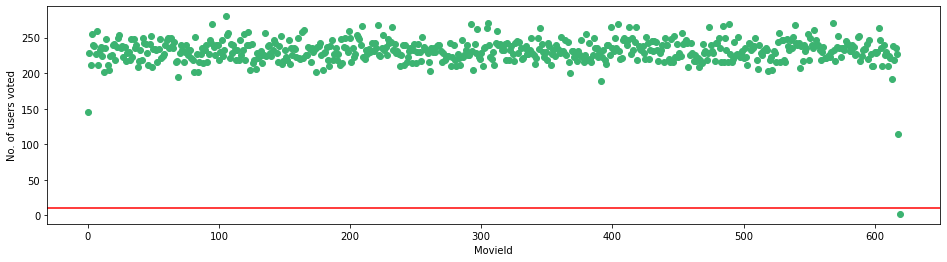

In [50]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

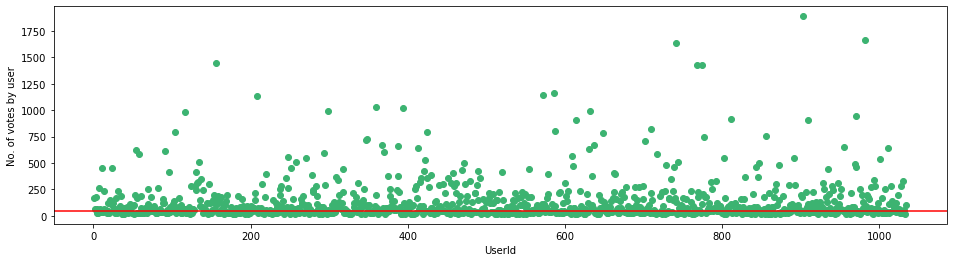

In [51]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()


In [52]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset

userId,1,2,3,5,7,8,11,13,14,16,...,1020,1022,1023,1024,1025,1026,1028,1030,1031,1034
movieId,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.00,0.0,0.0,0.0,0.0,0.0,0.0
1,3.5,0.0,0.0,0.0,3.0,0.0,3.5,3.0,0.0,0.0,...,0.0,4.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.5,0.00,0.0,0.0,0.0,4.5,0.0,5.0
3,4.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,4.0,...,0.0,0.0,3.0,0.00,1.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.00,0.0,0.0,3.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.50,4.0,0.0,0.0,3.5,0.0,0.0
616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,...,5.0,1.0,0.0,0.00,0.0,0.0,4.0,0.0,0.0,0.0


In [53]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [54]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [67]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies4[movies4['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies4[movies4['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies4.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(0,n_movies_to_reccomend))
        return df
    else:
        return "No movies found. Please check your input"

In [68]:
get_movie_recommendation('Chhakka Panja 2')

,Title,Distance
0,The Contagious Apparitions of Dambarey Dendrite,0.659056
1,Transforming the Present,0.654956
2,Mystic Mountain,0.654772
3,Dakshina,0.654493
4,Wasfia,0.652363
5,Blue Kangling,0.651833
6,Bholi Dekhi Chhodi Dinchhu,0.642697
7,Talk of the town USA,0.642379
8,Young Torture: Namarosh Hamro Maya,0.641120
9,Ujeli: A Child Bride in Nepal,0.640579


## Hybrid Recommendation System

In [74]:
movie_name = 'Chhakka Panja 2'
recommendations_cf = get_movie_recommendation(movie_name)
recommendations_cb = recommend(movie_name)

# Merge the recommendations using a weighted average
merged_recommendations = pd.merge(recommendations_cf, recommendations_cb, on='Title', how='inner')
merged_recommendations['Weighted_Score'] = merged_recommendations['Distance_x'] * 0.6 + merged_recommendations['Distance_y'] * 0.4
merged_recommendations = merged_recommendations.sort_values(by='Weighted_Score', ascending=False).head(n_movies_to_recommend)

print(merged_recommendations)

Chhakka Panja 2
Chhakka Panja
Chhakka Panja 3
Woda Number 6
Chha Ekan Chha
Himalayan Kingdom of Nepal
Meri Bassai
Darpan Chhaya
Jai Bhole


TypeError: Can only merge Series or DataFrame objects, a <class 'NoneType'> was passed